<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np


Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:

df = pd.read_csv('data.csv', sep=',')
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = [x for x in df.columns if df[x].dtype == object]

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
# Mamy dużo wartości "?"
for col in df.columns:
    print(col, ":\n", df[col].value_counts(), "\n")

age :
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

workclass :
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

fnlwgt :
 164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64 

education :
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 P

In [5]:
# Usuwamy wartości "?"
df.replace(' ?', np.NaN, inplace=True)
print("========== Usunięte wartości '?' ==========")
for col in df.columns:
    print(col, ":\n", df[col].value_counts(), "\n")

========== Usunięte wartości '?' ==========
age :
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

workclass :
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

fnlwgt :
 164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64 

education :
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th

In [6]:
# Następnie można zauważyć, że dostaliśmy przez to sporo wartości null
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [7]:
# Usuwamy null'e
for col in df:
    df[col].fillna(df[col].mode()[0], inplace = True)

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [8]:
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [9]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: Future

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

def test_data(X_train, y_train, X_test, y_test, indexes, cols):
    # instantiate the model
    gnb = GaussianNB()

    # fit the model
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_pred_train = gnb.predict(X_train)

    print("Test data:", y_pred)
    print("Train data:", y_pred_train)

    print("Training data accuracy:", accuracy_score(y_train, y_pred_train))
    print("Training data score:", gnb.score(X_train, y_train))

    print("Test data accuracy:", accuracy_score(y_test, y_pred))
    print("Test data score:", gnb.score(X_test, y_test))

    matrix = confusion_matrix(y_test, y_pred)
    print("Matrix:\n", matrix)

    print("Correct positive: ", matrix[0, 0])
    print("Correct negative: ", matrix[1, 1])

    print("False positive: ", matrix[0, 1])
    print("False negative: ", matrix[1, 0])

    # Klasyfikacja
    print(classification_report(y_test, y_pred))

    # Wyświetlamy macierz jako heatmapę, gdzie kolumny uznaczają wartość danych, a wiersze wartość predykcji
    df_m = pd.DataFrame(matrix, index = indexes, columns=cols)
    sns.heatmap(df_m, annot=True, fmt='d')
    plt.title("Prediction heatmap")

    return gnb

Test data: [' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']
Train data: [' >50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']
Training data accuracy: 0.7938750438750439
Training data score: 0.7938750438750439
Test data accuracy: 0.7974204115057836
Test data score: 0.7974204115057836
Matrix:
 [[7041  366]
 [1613  749]]
Correct positive:  7041
Correct negative:  749
False positive:  366
False negative:  1613
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7407
        >50K       0.67      0.32      0.43      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



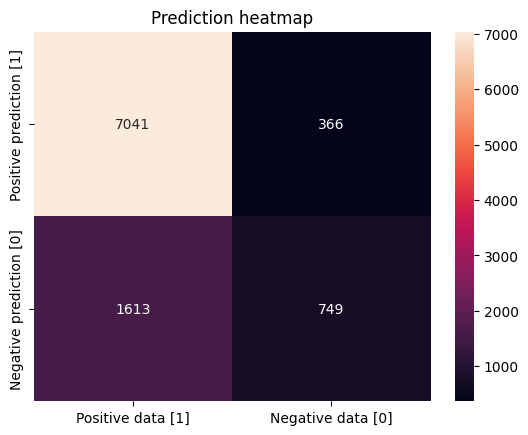

In [11]:
matrix = test_data(X_train, y_train, X_test, y_test, ['Positive prediction [1]', 'Negative prediction [0]'], ['Positive data [1]', 'Negative data [0]'])

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/minik/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: Future

Test data: [' White' ' White' ' White' ... ' White' ' White' ' White']
Train data: [' White' ' White' ' White' ... ' White' ' White' ' White']
Training data accuracy: 0.836916461916462
Training data score: 0.836916461916462
Test data accuracy: 0.8478861705394616
Test data score: 0.8478861705394616
Matrix:
 [[   0    1    0    0   79]
 [   0    2    1    0  315]
 [   0    4   62    0  845]
 [   0    0    1    0   71]
 [   0   44  125    0 8219]]
Correct positive:  0
Correct negative:  2
False positive:  1
False negative:  0


/home/minik/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/minik/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/minik/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.00      0.00      0.00        80
 Asian-Pac-Islander       0.04      0.01      0.01       318
              Black       0.33      0.07      0.11       911
              Other       0.00      0.00      0.00        72
              White       0.86      0.98      0.92      8388

           accuracy                           0.85      9769
          macro avg       0.25      0.21      0.21      9769
       weighted avg       0.77      0.85      0.80      9769



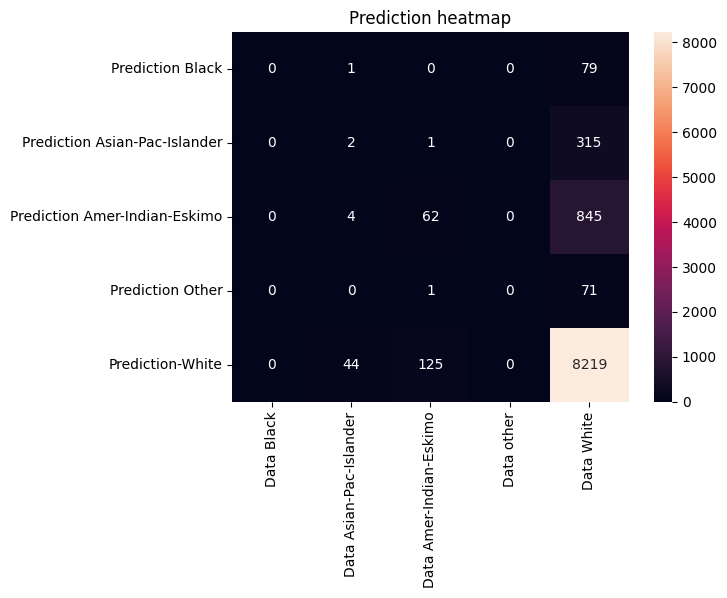

In [12]:
X = df.drop(['race'], axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

gnb = test_data(X_train, y_train, X_test, y_test, ['Prediction Black', 'Prediction Asian-Pac-Islander', 'Prediction Amer-Indian-Eskimo', 'Prediction Other', 'Prediction-White'], ['Data Black', 'Data Asian-Pac-Islander', 'Data Amer-Indian-Eskimo', 'Data other', 'Data White'])

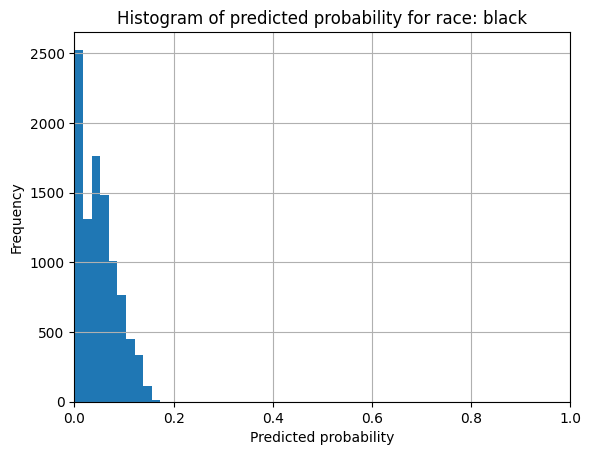

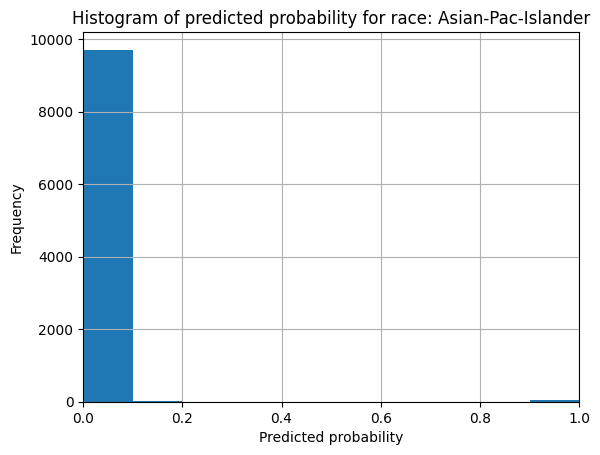

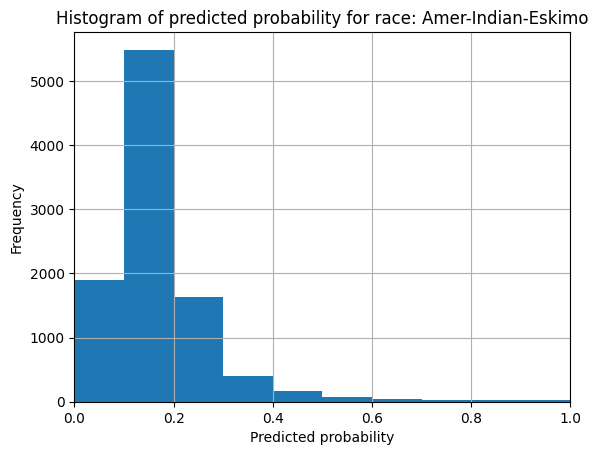

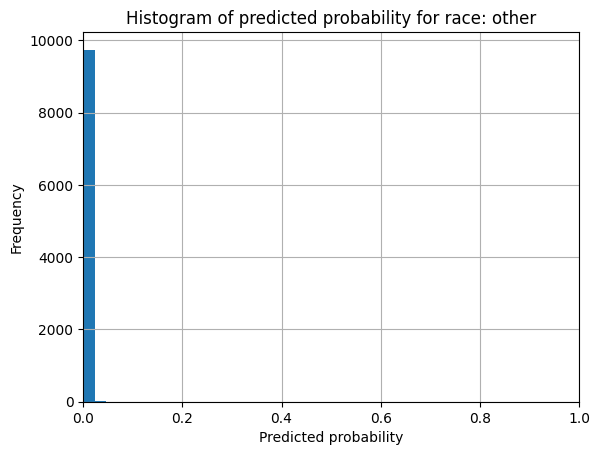

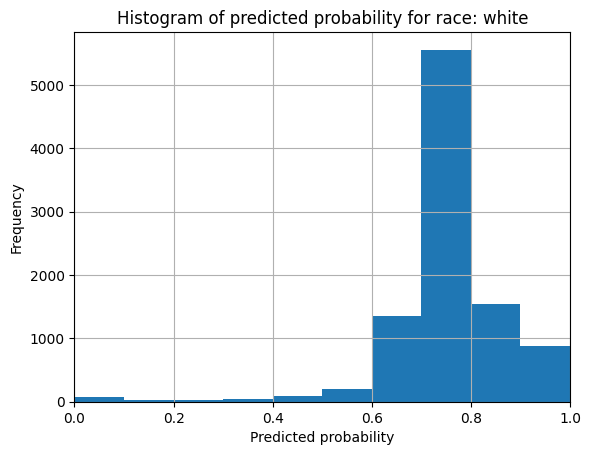

In [13]:
races = ['black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'other', 'white']
for i in range(5):
    pred = gnb.predict_proba(X_test)[:, i]
    plt.hist(pred, bins = 10)
    plt.xlim([0, 1])
    plt.title("Histogram of predicted probability for race: " + races[i])
    plt.xlabel("Predicted probability")
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

**Wnioski**
1) Omawiany sposób predykcji nie jest zbyt dobry, ma tendencje do trzymania się jednej odpowiedzi (którą dobrze potrafi przewidzieć - w naszym przypadku człowiek biały), ale słabo przez to rozpoznaje pozostałe 
2) Opcja "inne" wypada najsłabiej, im lepiej zdefiniowane dane tym lepsza predykcja
3) Omawiany sposób predykcji działa zarówno dla binarnego podziału, jak i dla wielu opcji
4) Metoda działa raczej szybko, nie trzeba czekać długo na wyniki
5) Metoda jest łatwa do zrozumienia i zaimplementowania w języku Python
6) Wyniki predykcji najczytelniej przedstawić na heatmap'ie

**Michał Tomecki 16.12.2022**